In [1]:
import pandas as pd

In [10]:
red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

In [11]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
red_wine = red_wine[['alcohol', 'residual sugar', 'pH']]
red_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)

In [13]:
red_wine['class'] = 0
red_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


In [14]:
white_wine = white_wine[['alcohol', 'residual sugar', 'pH']]
white_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)

white_wine['class'] = 1
white_wine.head()

,alcohol,sugar,pH,class
0,8.8,20.7,3.00,1
1,9.5,1.6,3.30,1
2,10.1,6.9,3.26,1
3,9.9,8.5,3.19,1
4,9.9,8.5,3.19,1


In [17]:
wine = pd.concat([red_wine, white_wine])

In [18]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 253.8 KB


In [19]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

In [20]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)

DecisionTreeClassifier()

In [23]:
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.996921300750433
0.8569230769230769


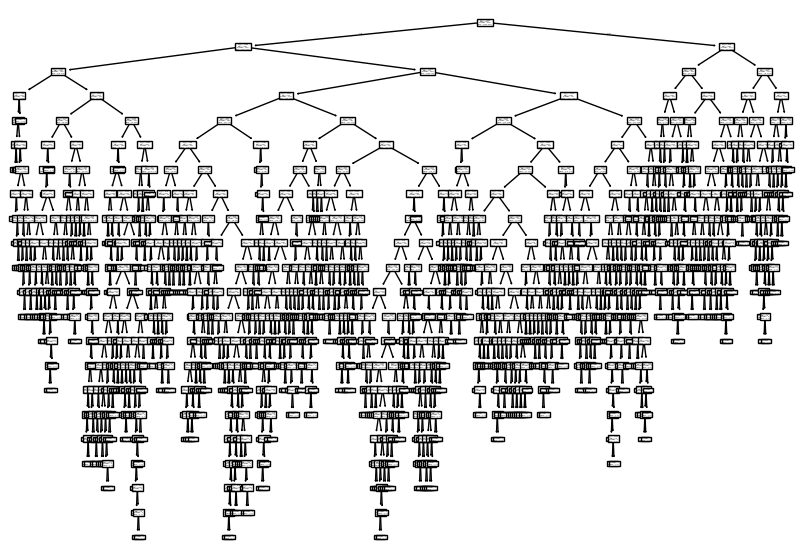

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

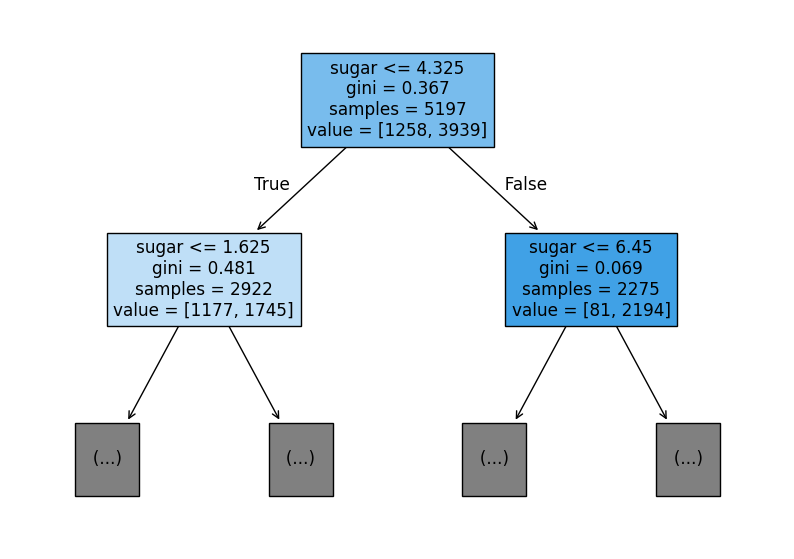

In [27]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, feature_names=['alcohol', 'sugar', 'pH'], filled=True)
plt.show()

In [29]:
df = DecisionTreeClassifier(max_depth=3, random_state=42)
df.fit(train_input, train_target)
print(df.score(train_input, train_target))
print(df.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


[Text(0.5, 0.875, 'sugar <= 4.325\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.25, 0.625, 'sugar <= 1.625\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'sugar <= 1.375\ngini = 0.184\nsamples = 1054\nvalue = [108, 946]'),
 Text(0.0625, 0.125, 'gini = 0.032\nsamples = 555\nvalue = [9, 546]'),
 Text(0.1875, 0.125, 'gini = 0.318\nsamples = 499\nvalue = [99, 400]'),
 Text(0.375, 0.375, 'alcohol <= 11.025\ngini = 0.49\nsamples = 1868\nvalue = [1069, 799]'),
 Text(0.3125, 0.125, 'gini = 0.42\nsamples = 1141\nvalue = [798, 343]'),
 Text(0.4375, 0.125, 'gini = 0.468\nsamples = 727\nvalue = [271.0, 456.0]'),
 Text(0.75, 0.625, 'sugar <= 6.45\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'pH <= 3.255\ngini = 0.189\nsamples = 529\nvalue = [56, 473]'),
 Text(0.5625, 0.125, 'gini = 0.098\nsamples = 329\nvalue = [17, 312]'),
 Text(0.6875, 0.125, 'gini = 0.314\nsamples

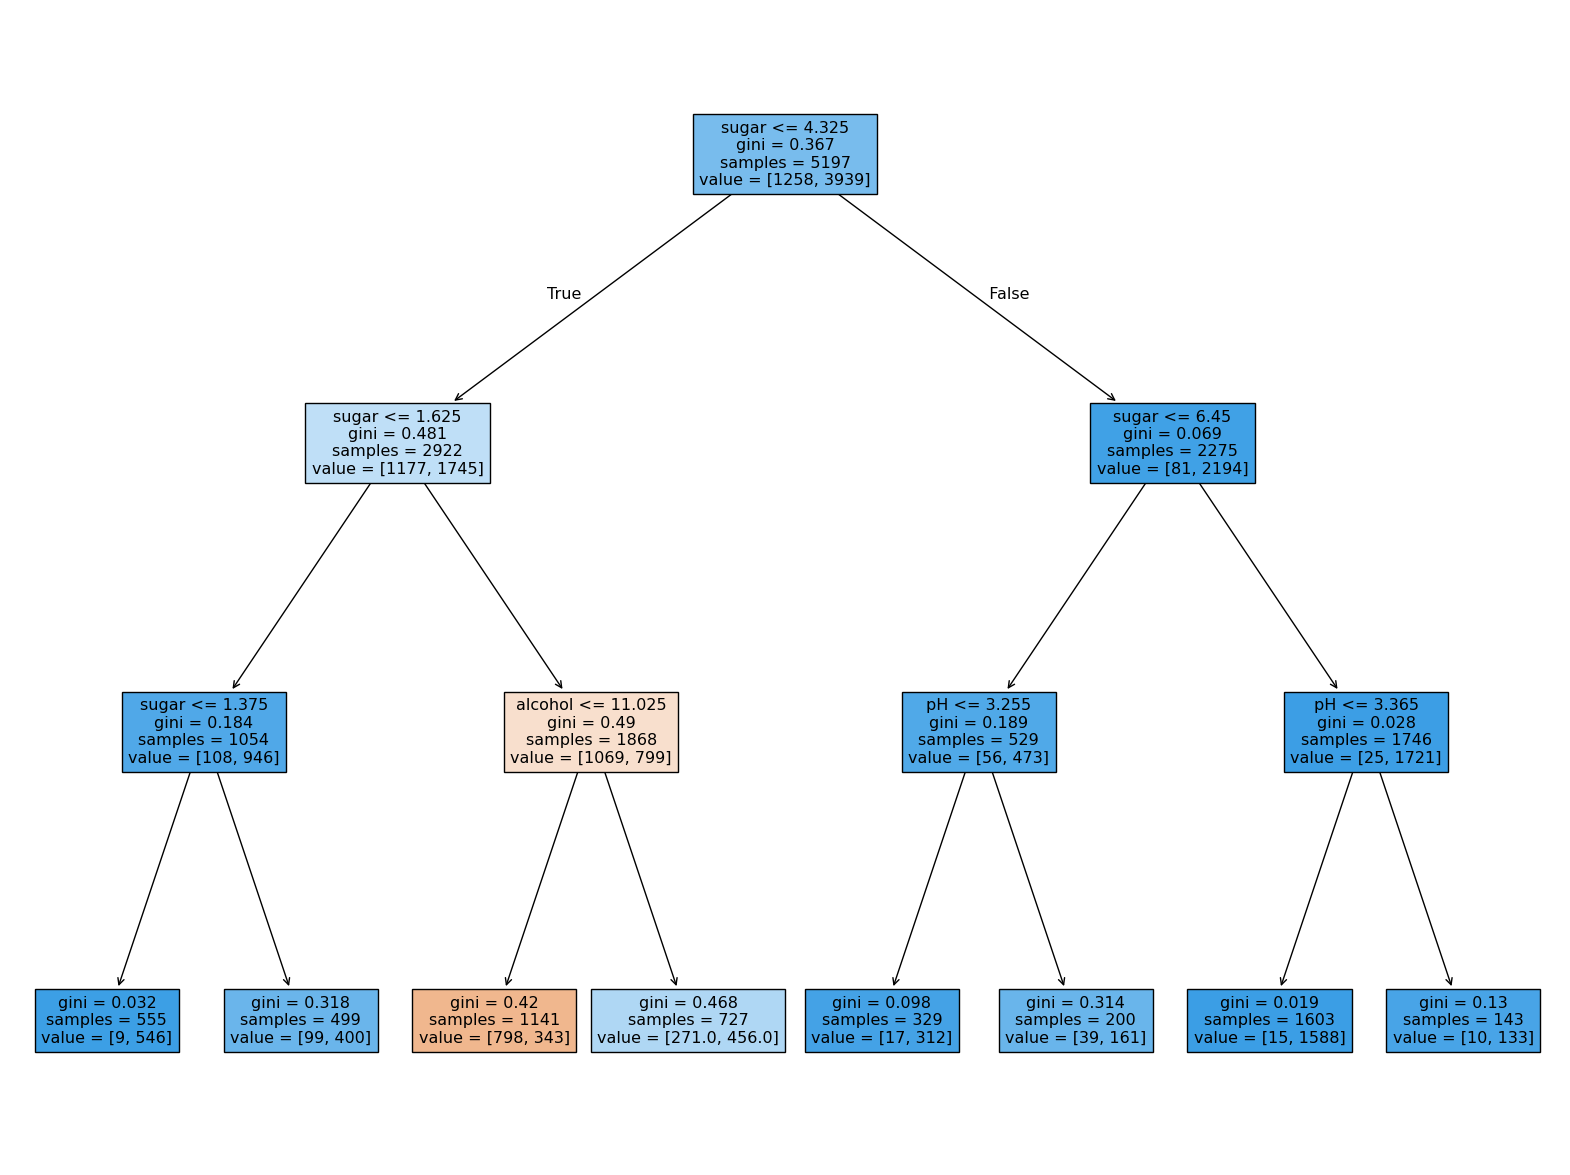

In [30]:
plt.figure(figsize=(20, 15))
plot_tree(df, filled=True, feature_names=['alcohol', 'sugar', 'pH'])